# Demo of do_bins and hist_2d functions using numba

# test_bin.py: create a dataset that is the sum of two 2D gaussians using makeRandom:

In [1]:
import numpy.random as nr
def makeRandom(meanx=None,stdx=None,meany=None,stdy=None,rho=None,
               numpoints=4000):
    """
        return a tuple with two vectors (xvec,yvec) giving the
        coordinates of numpoints chosen from a two dimensional
        Gauassian distribution

        Parameters
        ----------

        meanx: float -- mean in x direction
        stdx:  float -- standard deviation in x direction
        meany: float -- mean in y direction
        stdy:  float -- standar deviation in y direction
        numpoints:  length of returned xvec and yvec
        

        Returns
        -------

        (xvec, yvec): tuple of ndarray vectors of length numpoints

        Example
        -------

        invalues={'meanx':450.,
                  'stdx':50,
                  'meany':-180,
                  'stdy':40,
                  'rho':0.8}

        chanx,chany=makeRandom(**invalues)
        

    """
 
    nr.seed(50)
    sigma=np.array([stdx**2., rho*stdx*stdy, rho*stdx*stdy, stdy**2.])
    sigma.shape=[2,2]
    meanvec=[meanx,meany]
    outRandom=nr.multivariate_normal(meanvec,sigma,[numpoints,])
    chan1=outRandom[:,0]
    chan2=outRandom[:,1]
    return (chan1,chan2)


Use this to create an x vector and a y vector to histogram

In [2]:
#
# first bullseye centered at (x=450,y= -180)
#
invalues={'meanx':450.,
          'stdx':50,
          'meany':-180,
          'stdy':40,
          'rho':0.8}


chanx,chany=makeRandom(**invalues)

#
# second bullseye centered at (x=50,y=-80)
#
bullseye={'meanx':50.,
          'stdx':14,
          'meany':-80,
          'stdy':14,
          'rho':0.0}

chanxB,chanyB=makeRandom(**bullseye)
chanx=np.concatenate((chanx,chanxB))
chany=np.concatenate((chany,chanyB))


Here is the scatterplot:

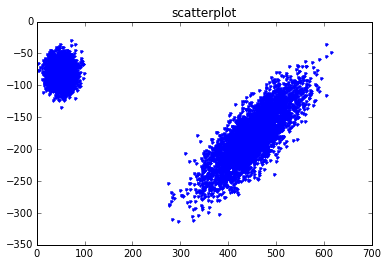

In [3]:
%matplotlib inline
fig1=plt.figure(1)
fig1.clf()
axis1=fig1.add_subplot(111)
axis1.plot(chanx,chany,'b.')
axis1.set_title('scatterplot')
fig1.canvas.draw()
fig1.savefig('scatter.png')

now bin these two channels

In [4]:
col_bins=np.linspace(0,700,70)
row_bins=np.linspace(-400,0,50)

In [5]:
col_indices=np.searchsorted(col_bins,chanx.flat,'right')
row_indices=np.searchsorted(row_bins,chany.flat,'right')

In [6]:
from hist_numba import numba_hist2d
from importlib import reload
import hist_numba
reload(hist_numba)

<module 'hist_numba' from '/Users/phil/repos/pythonlibs/hist2d/hist_numba.py'>

In [7]:
hist_array,x_centers,y_centers=numba_hist2d(chanx.ravel(),chany.ravel(),col_bins,row_bins)

in numba


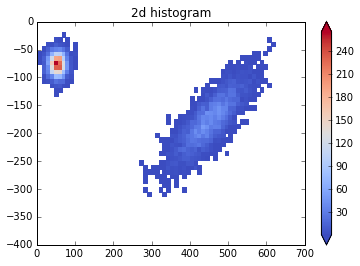

In [11]:
fig3=plt.figure(1)
from matplotlib.colors import Normalize
the_norm=Normalize()
cmap=plt.get_cmap('coolwarm')
axis1=fig3.add_subplot(111)
mask=np.isnan(hist_array)
hist_array=np.ma.array(hist_array,mask=mask)
im=axis1.pcolormesh(x_centers,y_centers,hist_array,cmap=cmap,norm=the_norm)
cb=fig3.colorbar(im,extend='both')
axis1.set_title('2d histogram')
